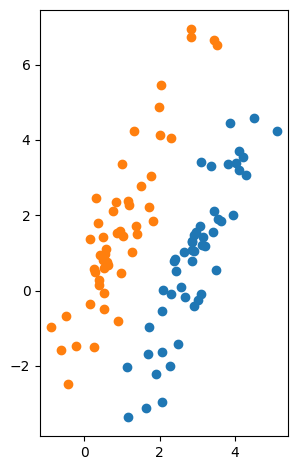

In [ ]:
# 疑似データの作成
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import multivariate_normal

N=100
X = np.vstack( [
                multivariate_normal([3, 1], [[1, 2], [2, 5]], size=N//2),
                multivariate_normal([1, 2], [[1, 2], [2, 5]], size=N//2)
               ])
Y = np.hstack( [np.zeros(N//2), np.ones(N//2)])

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(X[:N//2, 0], X[:N//2, 1])
ax.scatter(X[N//2:, 0], X[N//2:, 1])
ax.set_aspect('equal', adjustable='box')
fig.tight_layout()
plt.show()

## PCA

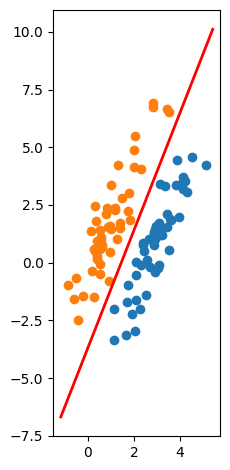

slope = 2.5515737259987508 (68.59904247481803 [deg])


In [ ]:
# 共分散行列を計算
mean_X = np.mean(X, axis=0)
X_centered = X - mean_X
cov_matrix = np.cov(X_centered, rowvar=False)

# 固有値分解
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# 最大の固有値に対応する固有ベクトルを取得
principal_component = eigenvectors[:, np.argmax(eigenvalues)]

# 第1主成分軸の傾きを計算
slope_pca = principal_component[1] / principal_component[0]

# 第1主成分軸の傾きの角度を計算
angle_rad = np.arctan(slope_pca)
angle_deg = np.degrees(angle_rad)

# 散布図に第1主成分軸を描く
mean_x, mean_y = mean_X
x_vals = np.array(ax.get_xlim())
y_vals = mean_y + slope_pca * (x_vals - mean_x)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(X[:N//2, 0], X[:N//2, 1])
ax.scatter(X[N//2:, 0], X[N//2:, 1])
ax.plot(x_vals, y_vals, color='red', linewidth=2)
ax.set_aspect('equal', adjustable='box')
fig.tight_layout()
plt.show()

# 第1主成分軸の傾きを表示
print("slope = " + str(slope_pca) + " (" + str(angle_deg) + " [deg])")

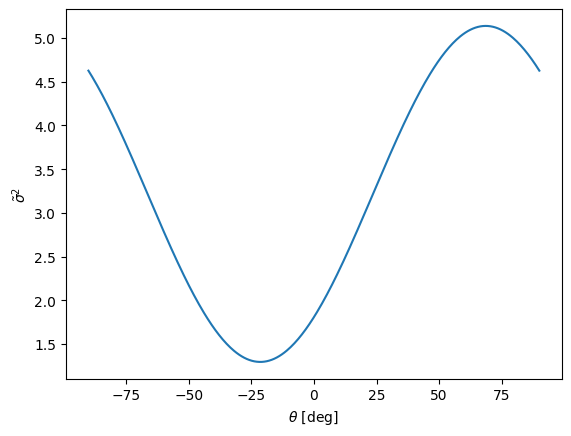

max variance = 5.138479134389463 at 68.4401114206128 [deg]


In [ ]:
theta = np.radians(np.linspace(-90, 90, 360))
variances = []

for t in theta:
    direction = np.array([np.cos(t), np.sin(t)])
    projected_data = X_centered @ direction
    variance = np.var(projected_data)
    variances.append(variance)

variances = np.array(variances)
optimal_theta = theta[np.argmax(variances)]
max_variance = variances[np.argmax(variances)]

# 分散をプロット
plt.figure()
plt.plot(np.degrees(theta), variances)
plt.xlabel(r'$\theta$ [deg]')
plt.ylabel(r'$\tilde{\sigma}^2$')
plt.show()

# 分散が最大となるθの値を表示
print("max variance = " + str(max_variance) + " at " + str(np.degrees(optimal_theta)) + " [deg]")

## LDA


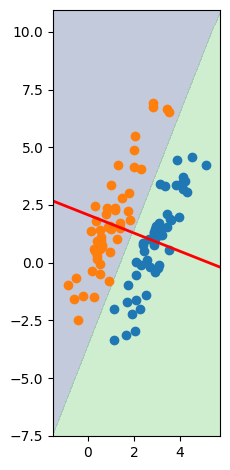

slope = -0.3959577466383494 (-21.60147293899114 [deg])
lambda = 0.3273261001062894


In [ ]:
# クラスごとの平均ベクトルを計算
mean_0 = np.mean(X[:N//2], axis=0)
mean_1 = np.mean(X[N//2:], axis=0)

# クラス内の散布行列を計算
S_w = np.zeros((2, 2))
for i in range(N//2):
    S_w += (X[i] - mean_0).reshape(2, 1) @ (X[i] - mean_0).reshape(1, 2)
    S_w += (X[N//2 + i] - mean_1).reshape(2, 1) @ (X[N//2 + i] - mean_1).reshape(1, 2)

# クラス間の散布行列を計算
mean_diff = (mean_0 - mean_1).reshape(2, 1)
S_b = mean_diff @ mean_diff.T

# クラス内の散布行列の逆行列を計算
S_w_inv = np.linalg.inv(S_w)

# 最適な投影方向を求める
w = S_w_inv @ (mean_0 - mean_1)

# 固有値分解
eigvals, eigvecs = np.linalg.eig(S_w_inv @ S_b)

# 最大の固有値に対応する固有ベクトルを選択
max_eigvec = eigvecs[:, np.argmax(eigvals)]

# 軸の傾きを計算
slope_lda = w[1] / w[0]

# 軸の傾きの角度を計算
angle_rad = np.arctan(slope_lda)
angle_deg = np.degrees(angle_rad)

# 決定境界で色分けする
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

projection = grid @ w
decision_boundary = (mean_0 + mean_1) @ w / 2

Z = (projection > decision_boundary).reshape(xx.shape)

# 散布図に軸を描画
mean_x, mean_y = np.mean(X, axis=0)
x_vals = np.array(ax.get_xlim())
y_vals = mean_y + slope_lda * (x_vals - mean_x)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.contourf(xx, yy, Z, alpha=0.3, levels=[-1, 0, 1])
ax.scatter(X[:N//2, 0], X[:N//2, 1])
ax.scatter(X[N//2:, 0], X[N//2:, 1])
ax.plot(x_vals, y_vals, color='red', linewidth=2)
ax.set_aspect('equal', adjustable='box')
fig.tight_layout()
plt.show()

# 軸の傾きと固有値を表示
print("slope = " + str(slope_lda) + " (" + str(angle_deg) + " [deg])")
print("lambda = " + str(eigvals[np.argmax(eigvals)]))

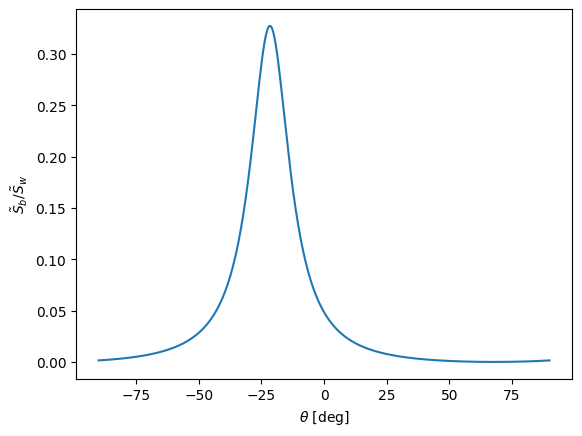

max Sb / Sw = 0.3271673122491662 at -21.810584958217277 [deg]


In [ ]:
theta = np.radians(np.linspace(-90, 90, 360))
ratios = []

for t in theta:
    direction = np.array([np.cos(t), np.sin(t)])
    # クラス内の分散
    Sw_projected = sum([(np.dot((X[i] - mean_0), direction))**2 for i in range(N//2)]) + sum([(np.dot((X[N//2 + i] - mean_1), direction))**2 for i in range(N//2)])
    # クラス間の分散
    Sb_projected = np.dot(mean_diff.T, direction)**2
    # 分散の比
    ratio = Sb_projected[0] / Sw_projected
    ratios.append(ratio)

ratios = np.array(ratios)
optimal_theta_index = np.argmax(ratios)
optimal_theta = theta[optimal_theta_index]
max_ratio = ratios[optimal_theta_index]

# 分散比をプロット
plt.figure()
plt.plot(np.degrees(theta), ratios)
plt.xlabel(r'$\theta$ [deg]')
plt.ylabel(r'$\tilde{S}_b / \tilde{S}_w$')
plt.show()

# 最大となる分散比の値とその時のθの値を表示
print("max Sb / Sw = " + str(max_ratio) + " at " + str(np.degrees(optimal_theta)) + " [deg]")

## Histograms

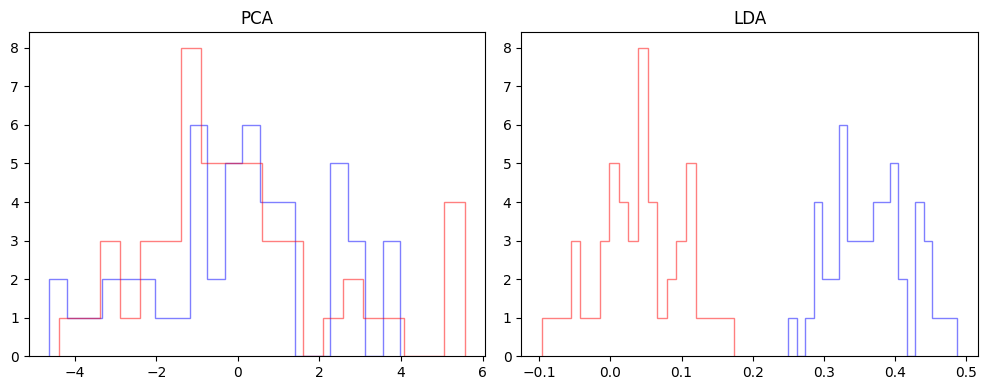

In [ ]:
# PCA変換
X_pca = X_centered @ principal_component

# LDA変換
X_lda = X @ w

# ヒストグラムを描画
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].hist(X_pca[Y == 0], bins=20, alpha=0.5, color='blue', histtype='step')
axes[0].hist(X_pca[Y == 1], bins=20, alpha=0.5, color='red', histtype='step')
axes[0].set_title('PCA')

axes[1].hist(X_lda[Y == 0], bins=20, alpha=0.5, color='blue', histtype='step')
axes[1].hist(X_lda[Y == 1], bins=20, alpha=0.5, color='red', histtype='step')
axes[1].set_title('LDA')

fig.tight_layout()
plt.show()